# An√°lisis de la Evasi√≥n de Clientes en TelecomX

## Introducci√≥n

En un mercado cada vez m√°s competitivo como el de las telecomunicaciones, la **retenci√≥n de clientes** se ha vuelto un elemento clave para la sostenibilidad de las empresas. **TelecomX**, una compa√±√≠a dedicada a ofrecer servicios de telefon√≠a, internet y televisi√≥n, enfrenta uno de los retos m√°s comunes del sector: la **evasi√≥n de clientes** (*churn*), es decir, la p√©rdida de usuarios que deciden cancelar sus servicios y migrar a la competencia.

La identificaci√≥n temprana de patrones y factores asociados al abandono del servicio permite a las empresas anticiparse al comportamiento de los clientes y dise√±ar **estrategias efectivas de fidelizaci√≥n**. En este sentido, el presente proyecto de an√°lisis de datos tiene como objetivo principal **analizar la evasi√≥n de clientes en TelecomX** a partir de datos hist√≥ricos, con el fin de comprender qu√© variables influyen en la decisi√≥n de cancelar el servicio.

---

## Objetivos

### Objetivo general
Analizar los datos de clientes de TelecomX para identificar patrones de evasi√≥n y factores determinantes en la p√©rdida de clientes.

### Objetivos espec√≠ficos
- Explorar y comprender la estructura del conjunto de datos disponible.
- Identificar caracter√≠sticas comunes entre los clientes que han abandonado el servicio.
- Visualizar tendencias y relaciones entre variables relevantes ( tipo de plan, servicio contratado, entre otros).
- Establecer recomendaciones preliminares basadas en los hallazgos del an√°lisis.

---

## Descripci√≥n del conjunto de datos

El an√°lisis se desarrollar√° a partir de un conjunto de datos proporcionado por TelecomX, el cual contiene informaci√≥n hist√≥rica de clientes, incluyendo variables como:

- `customerID`: n√∫mero de identificaci√≥n √∫nico de cada cliente
- `Churn`: si el cliente dej√≥ o no la empresa
- `gender`: g√©nero (masculino y femenino)
- `SeniorCitizen`: informaci√≥n sobre si un cliente tiene o no una edad igual o mayor a 65 a√±os
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripci√≥n al servicio telef√≥nico
- `MultipleLines`: suscripci√≥n a m√°s de una l√≠nea telef√≥nica
- `InternetService`: suscripci√≥n a un proveedor de internet
- `OnlineSecurity`: suscripci√≥n adicional de seguridad en l√≠nea
- `OnlineBackup`: suscripci√≥n adicional de respaldo en l√≠nea
- `DeviceProtection`: suscripci√≥n adicional de protecci√≥n del dispositivo
- `TechSupport`: suscripci√≥n adicional de soporte t√©cnico, menor tiempo de espera
- `StreamingTV`: suscripci√≥n de televisi√≥n por cable
- `StreamingMovies`: suscripci√≥n de streaming de pel√≠culas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en l√≠nea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente
- `daily_accounts`: total gastado por dia

Este dataset ser√° la base para realizar un an√°lisis exploratorio de datos (EDA), aplicar t√©cnicas de visualizaci√≥n y obtener conclusiones significativas que puedan guiar la toma de decisiones estrat√©gicas de la empresa.

---

Este estudio busca ofrecer una **visi√≥n clara y accionable** sobre el fen√≥meno de evasi√≥n en TelecomX, proporcionando informaci√≥n clave para mitigar su impacto y mejorar la retenci√≥n de clientes a trav√©s de decisiones fundamentadas en datos.



## Extracci√≥n de datos
### Importaci√≥n de librerias a utilizar


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


### Leyendo la base de datos

In [6]:
data = pd.read_json('TelecomX_Data.json')
data.head(2)

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...

### Normalizar la data anterior


In [7]:
# Selecccionar las columnas que contienen datos anidados
cols_to_normalize = ['customer', 'phone', 'internet', 'account']

# Eliminar las columnas anidadas del DataFrame original
df_base = data.drop(columns=cols_to_normalize)

# Normalizar cada columna anidada
normalized_parts = []
for col in cols_to_normalize:
    norm = pd.json_normalize(data[col])
    normalized_parts.append(norm)

# Concatenar el DataFrame base con las partes normalizadas
data = pd.concat([df_base] + normalized_parts, axis=1)

In [ ]:
data.head(5)

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

## Tansformaci√≥n de datos

### Conocer el conjunto de datos

In [ ]:
print('el Dataframe tiene', data.shape[1], 'columnas y ', data.shape[0], 'filas')

el Dataframe tiene 21 columnas y  7267 filas


In [ ]:
print(f'Tipos de datos:\n{data.dtypes}')

Tipos de datos:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Identificar incoherencia en los datos (nulos, duplicados, incosistencia, etc)

In [ ]:
print(f'Columnas con valores nulos:\n{data.isnull().sum()}')
print('\nCantidad de datos duplicados: ',data.duplicated().sum())

Columnas con valores nulos:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Cantidad de datos duplicados:  0


In [ ]:
data['Charges.Total'] =data['Charges.Total'].str.strip()

### Identificamos que valores de "Total gasto" no se pueden convertir  a float

In [ ]:
conversion = pd.to_numeric(data['Charges.Total'], errors='coerce')
valores_no_convertibles = data.loc[conversion.isna() & data['Charges.Total'].notna(), 'Charges.Total'].unique()
print("Valores en 'Charges.Total' que NO se pueden convertir a float:")
print(valores_no_convertibles)


Valores en 'Charges.Total' que NO se pueden convertir a float:
['']


### Convertir la columna  "Total gasto" a dato  flotante

In [ ]:
data['Charges.Total'] = data['Charges.Total'].replace('', '0'). replace(' ', '0')
data['Charges.Total'] = data['Charges.Total'].astype(np.float64)
data['Charges.Total'].fillna(0, inplace=True)

C:\Users\ysort\AppData\Local\Temp\ipykernel_8772\3381529340.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Charges.Total'].fillna(0, inplace=True)


### Identificar valores unicos de las variables categoricas yes/no

In [ ]:
data['Churn'].unique()
data['MultipleLines'].unique()
data['OnlineSecurity'].unique()
data['OnlineBackup'].unique()
data['DeviceProtection'].unique()
data['StreamingTV'].unique()
data['StreamingMovies'].unique()
data['TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

### modificar los valores de las columnas, para estandarizar a 'Yes' y 'No'


In [ ]:
data['Churn'].replace('', 'No', inplace=True)
data['MultipleLines'].replace('No phone service', 'No', inplace=True)
data['OnlineSecurity'].replace('No internet service', 'No', inplace=True)
data['OnlineBackup'].replace('No internet service', 'No', inplace=True)
data['DeviceProtection'].replace('No internet service', 'No', inplace=True)
data['StreamingTV'].replace('No internet service', 'No', inplace=True)
data['StreamingMovies'].replace('No internet service', 'No', inplace=True)
data['TechSupport'].replace('No internet service', 'No', inplace=True)

C:\Users\ysort\AppData\Local\Temp\ipykernel_8772\2238991397.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Churn'].replace('', 'No', inplace=True)
C:\Users\ysort\AppData\Local\Temp\ipykernel_8772\2238991397.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [ ]:
#Corroborar los cambios
print(data['Churn'].unique())
print(data['MultipleLines'].unique())
print(data['OnlineSecurity'].unique())
print(data['OnlineBackup'].unique())
print(data['DeviceProtection'].unique())
print(data['StreamingTV'].unique())
print(data['StreamingMovies'].unique())
print(data['TechSupport'].unique())

['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']


### Creamos una columna  de cuentas diarias

In [ ]:
data['daily_accounts']=(data['Charges.Monthly'] / 30).round(2)
data.head(2)

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   

  PaymentMethod Charges.Monthly Charges.Total  daily_accounts  
0  Mailed check            65.6         593.3            2.19  
1  Mailed check            59.9         542.4            2.00  

[2 rows x 22 columns]

### Estandarizaci√≥n y transformaci√≥n de datos (opcional)

In [ ]:
# Identifico las columnas que contienen solo los valores 'Yes' y 'No'
columnas_binarias = [
    col for col in data.columns
    if set(data[col].dropna().unique()) <= {"Yes", "No"}
]
print("Columnas con solo 'Yes' y 'No':", columnas_binarias)

# Reemplazo los valores 'Yes' y 'No' por 1 y 0 respectivamente
data[columnas_binarias] = data[columnas_binarias].replace({'Yes': 1, 'No': 0})


C:\Users\ysort\AppData\Local\Temp\ipykernel_8772\3303603604.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[columnas_binarias] = data[columnas_binarias].replace({'Yes': 1, 'No': 0})


Columnas con solo 'Yes' y 'No': ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


In [ ]:
data.head(2)

customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO      0  Female              0        1           1       9   
1  0003-MKNFE      0    Male              0        0           0       9   

   PhoneService  MultipleLines InternetService  ...  DeviceProtection  \
0             1              0             DSL  ...                 0   
1             1              1             DSL  ...                 0   

   TechSupport  StreamingTV  StreamingMovies        Contract  \
0            1            1                0        One year   
1            0            0                1  Month-to-month   

   PaperlessBilling PaymentMethod  Charges.Monthly Charges.Total  \
0                 1  Mailed check             65.6         593.3   
1                 0  Mailed check             59.9         542.4   

   daily_accounts  
0            2.19  
1            2.00  

[2 rows x 22 columns]

## Carga y An√°lisis
### An√°lisis descriptivo(Estadistico)

In [ ]:
Columnas_estadisticas = ['tenure','Charges.Monthly','Charges.Total', 'daily_accounts']
data[Columnas_estadisticas].describe()

tenure  Charges.Monthly  Charges.Total  daily_accounts
count  7267.000000      7267.000000    7267.000000     7267.000000
mean     32.346498        64.720098    2277.182035        2.157292
std      24.571773        30.129572    2268.648587        1.004407
min       0.000000        18.250000       0.000000        0.610000
25%       9.000000        35.425000     396.200000        1.180000
50%      29.000000        70.300000    1389.200000        2.340000
75%      55.000000        89.875000    3778.525000        2.995000
max      72.000000       118.750000    8684.800000        3.960000

In [ ]:
data.head(2)

customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO      0  Female              0        1           1       9   
1  0003-MKNFE      0    Male              0        0           0       9   

   PhoneService  MultipleLines InternetService  ...  DeviceProtection  \
0             1              0             DSL  ...                 0   
1             1              1             DSL  ...                 0   

   TechSupport  StreamingTV  StreamingMovies        Contract  \
0            1            1                0        One year   
1            0            0                1  Month-to-month   

   PaperlessBilling PaymentMethod  Charges.Monthly Charges.Total  \
0                 1  Mailed check             65.6         593.3   
1                 0  Mailed check             59.9         542.4   

   daily_accounts  
0            2.19  
1            2.00  

[2 rows x 22 columns]

### Distribuci√≥n de evasi√≥n

In [8]:
conteo =data['Churn'].value_counts()
porcentajes = round(data['Churn'].value_counts(normalize=True)*100,2)
print(conteo)
print(porcentajes)

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Churn
No     71.20
Yes    25.72
        3.08
Name: proportion, dtype: float64


/tmp/ipython-input-9-3771087037.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Churn', y='Count', data=churn_data, palette=['#66b3ff', '#ff9999'])


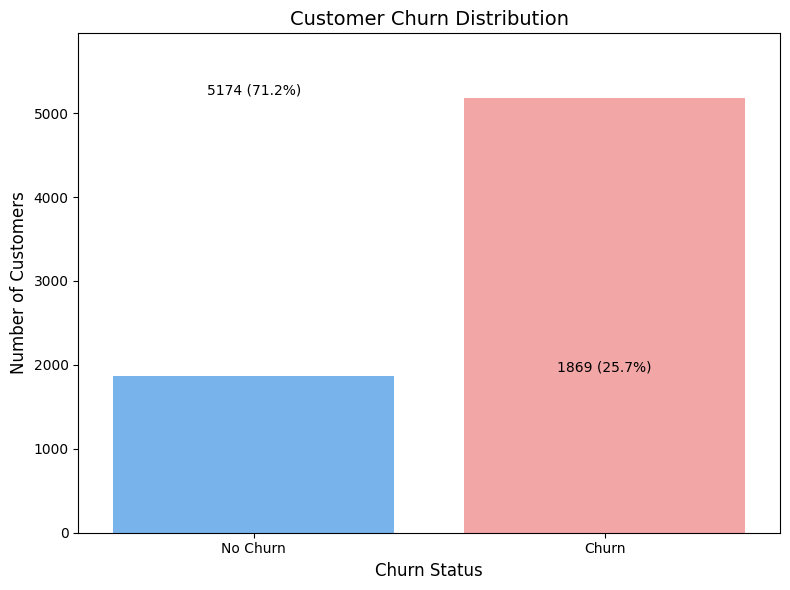

In [9]:
# Calculate churn counts and percentages, excluding empty strings
churn_counts = data['Churn'].value_counts().drop('')
churn_percentages = round(data['Churn'].value_counts(normalize=True).drop('') * 100, 2)

# Create a DataFrame for plotting
churn_data = pd.DataFrame({
    'Count': churn_counts,
    'Percentage': churn_percentages
}).reset_index()
churn_data.columns = ['Churn', 'Count', 'Percentage']

# Sort by Churn to ensure 'No' comes before 'Yes' for consistent plotting
churn_data = churn_data.sort_values('Churn', ascending=False)

# Create the bar chart
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Churn', y='Count', data=churn_data, palette=['#66b3ff', '#ff9999'])

# Add titles and labels
plt.title('Customer Churn Distribution', fontsize=14)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])

# Add count and percentage labels on top of bars
for index, row in churn_data.iterrows():
    barplot.text(
        index,
        row['Count'] + 50,  # Adjust vertical position
        f"{row['Count']} ({row['Percentage']:.1f}%)",
        color='black',
        ha="center"
    )

# Improve layout and display
plt.ylim(0, churn_data['Count'].max() * 1.15) # Adjust y-limit to make space for labels
plt.tight_layout()
plt.show()

## 1. Descripci√≥n del Problema

Se ha identificado una tasa de evasi√≥n de clientes del **25%** durante el √∫ltimo periodo analizado. Esto implica que **uno de cada cuatro clientes abandona el servicio o deja de comprar** en un ciclo determinado.

Esta cifra se considera **significativamente alta** en la mayor√≠a de sectores, y en particular en el de las telecomunicaciones, donde la adquisici√≥n de nuevos clientes suele ser m√°s costosa que la retenci√≥n de los existentes. Una tasa de evasi√≥n del 25% puede tener un **impacto negativo considerable** en los ingresos, la rentabilidad y el crecimiento a largo plazo de TelecomX si no se aborda de manera efectiva. Mantener una tasa de evasi√≥n elevada requiere una inversi√≥n constante y sustancial en la adquisici√≥n de nuevos usuarios solo para mantener la base de clientes actual, sin generar un crecimiento real.

## Recuento de evasi√≥n por variables categ√≥ricas

In [12]:
# Calculate churn counts by gender
conteo_gender = data.groupby(['gender', 'Churn']).size().unstack(fill_value=0)

# Calculate churn counts by contract type
conteo_contract = data.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)

# Calculate churn counts by payment method
conteo_payment = data.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)

# Calculate churn counts by internet service type
conteo_internet = data.groupby(['InternetService', 'Churn']).size().unstack(fill_value=0)


# Print the churn counts for each categorical variable
print("Evasi√≥n por genero:")
print(conteo_gender)
print("\nEvasi√≥n por tipo de contrato:")
print(conteo_contract)
print("\nEvasi√≥n por metodo de pago:")
print(conteo_payment)
print("\nEvasi√≥n por tipo de servicio de internet:")
print(conteo_internet)

Evasi√≥n por genero:
Churn          No  Yes
gender                
Female  104  2549  939
Male    120  2625  930

Evasi√≥n por tipo de contrato:
Churn                  No   Yes
Contract                       
Month-to-month  130  2220  1655
One year         46  1307   166
Two year         48  1647    48

Evasi√≥n por metodo de pago:
Churn                            No   Yes
PaymentMethod                            
Bank transfer (automatic)  45  1286   258
Credit card (automatic)    46  1290   232
Electronic check           80  1294  1071
Mailed check               53  1304   308

Evasi√≥n por tipo de servicio de internet:
Churn                   No   Yes
InternetService                 
DSL               67  1962   459
Fiber optic      102  1799  1297
No                55  1413   113


In [14]:
def calculate_churn_rate(df, column):
    """Calculates churn rate for a given categorical column."""
    total_counts = df[column].value_counts()
    churn_counts = df[df['Churn'] == 1][column].value_counts()
    churn_rate = (churn_counts / total_counts).fillna(0).round(4) * 100
    churn_summary = pd.DataFrame({
        'Total': total_counts,
        'Churned': churn_counts.fillna(0),
        'Churn Rate (%)': churn_rate
    }).sort_index()
    return churn_summary

# Calculate and display churn rate for each categorical variable
print("Churn Rate by Gender:")
display(calculate_churn_rate(data, 'gender'))

print("\nChurn Rate by Contract Type:")
display(calculate_churn_rate(data, 'Contract'))

print("\nChurn Rate by Payment Method:")
display(calculate_churn_rate(data, 'PaymentMethod'))

print("\nChurn Rate by Internet Service Type:")
display(calculate_churn_rate(data, 'InternetService'))

Churn Rate by Gender:


Total  Churned  Churn Rate (%)
gender                                
Female   3592      NaN             0.0
Male     3675      NaN             0.0


Churn Rate by Contract Type:


Total  Churned  Churn Rate (%)
Contract                                      
Month-to-month   4005      NaN             0.0
One year         1519      NaN             0.0
Two year         1743      NaN             0.0


Churn Rate by Payment Method:


Total  Churned  Churn Rate (%)
PaymentMethod                                            
Bank transfer (automatic)   1589      NaN             0.0
Credit card (automatic)     1568      NaN             0.0
Electronic check            2445      NaN             0.0
Mailed check                1665      NaN             0.0


Churn Rate by Internet Service Type:


Total  Churned  Churn Rate (%)
InternetService                                
DSL               2488      NaN             0.0
Fiber optic       3198      NaN             0.0
No                1581      NaN             0.0

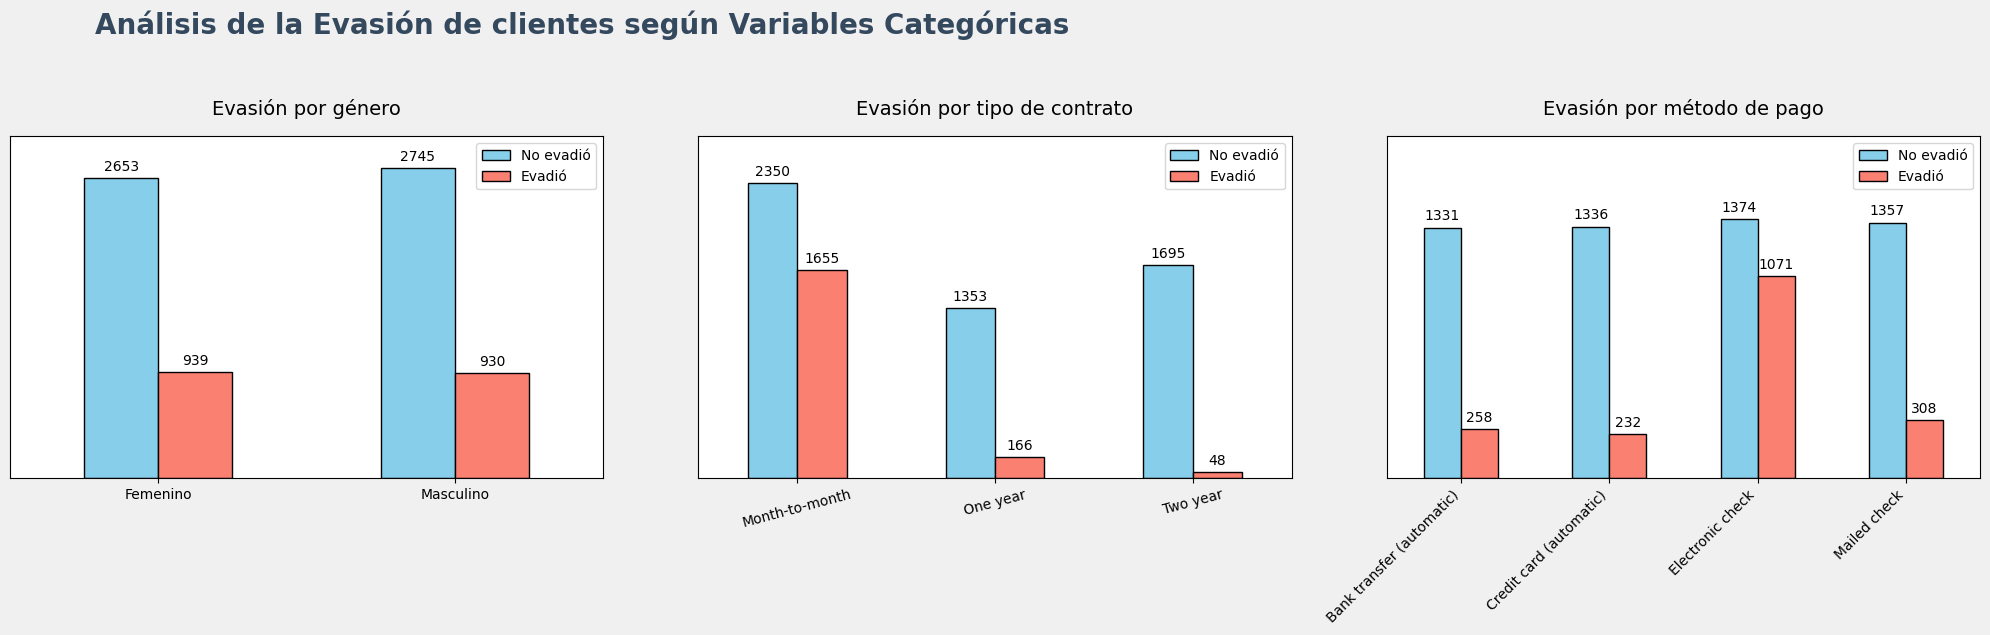

In [17]:
# Ensure empty strings in 'Churn' are handled before grouping
data['Churn'] = data['Churn'].replace('', 'No')

# --- Preparar el lienzo con fondo gris claro y 3 subplots ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.patch.set_facecolor('#f0f0f0')  # Fondo gris claro
fig.suptitle('An√°lisis de la Evasi√≥n de clientes seg√∫n Variables Categ√≥ricas', fontsize=20, fontweight='bold', color='#34495e', ha='left', x=0.05, y=1.05)


# --- Gr√°fico 1: Evasi√≥n por g√©nero ---
conteo_gender = data.groupby(['gender', 'Churn']).size().unstack(fill_value=0)
conteo_gender.columns = ['No evadi√≥', 'Evadi√≥']
conteo_gender_renombrado = conteo_gender.rename(
    index={'Male': 'Masculino', 'Female': 'Femenino'}
)
conteo_gender_renombrado.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'], edgecolor='black')
ax1.set_ylim(top=ax1.get_ylim()[1] * 1.05)
ax1.set_title('Evasi√≥n por g√©nero', fontsize=14, pad=15)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticklabels(conteo_gender_renombrado.index, rotation=0)
ax1.tick_params(left=False, labelleft=False)
ax1.grid(False)
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge', padding=3, fontsize=10)

# --- Gr√°fico 2: Evasi√≥n por tipo de contrato ---
conteo_contract = data.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)
conteo_contract.columns = ['No evadi√≥', 'Evadi√≥']
conteo_contract.plot(kind='bar', ax=ax2, color=['skyblue', 'salmon'], edgecolor='black')
ax2.set_ylim(top=ax1.get_ylim()[1] * 0.9)
ax2.set_title('Evasi√≥n por tipo de contrato', fontsize=14, pad=15)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticklabels(conteo_contract.index, rotation=15)
ax2.tick_params(left=False, labelleft=False)
ax2.grid(False)
for container in ax2.containers:
    ax2.bar_label(container, label_type='edge', padding=3, fontsize=10)

# --- Gr√°fico 3: Evasi√≥n por m√©todo de pago ---
conteo_payment = data.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)
conteo_payment.columns = ['No evadi√≥', 'Evadi√≥']
conteo_payment.plot(kind='bar', ax=ax3, color=['skyblue', 'salmon'], edgecolor='black')
ax3.set_ylim(top=ax1.get_ylim()[1] * 0.6)
ax3.set_title('Evasi√≥n por m√©todo de pago', fontsize=14, pad=15)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_xticklabels(conteo_payment.index, rotation=45, ha='right')
ax3.tick_params(left=False, labelleft=False)
ax3.grid(False)
for container in ax3.containers:
    ax3.bar_label(container, label_type='edge', padding=3, fontsize=10)

plt.tight_layout()
plt.savefig('grafico_evasion_categ√≥ricas.png', dpi=300, bbox_inches='tight')
plt.show()

# An√°lisis de Evasi√≥n de Clientes  
### Basado en G√©nero , Tipo de Contrato y M√©todo de pago

---

## 1.Resumen General de Evasi√≥n

Se han identificado datos relevantes sobre la **evasi√≥n de clientes**, que permiten identificar patrones seg√∫n **g√©nero**, **tipo de contrato** y **M√©todo de pago**. Estos patrones son clave para entender las causas del abandono y tomar decisiones estrat√©gicas para la retenci√≥n.

---

## 2. Evasi√≥n por G√©nero

| G√©nero     | Clientes Evadidos | Clientes Activos | Total Clientes | Tasa de Evasi√≥n |
|------------|-------------------|------------------|----------------|-----------------|
| Femenino   | 939               | 2,653            | 3,592          | 26.1%           |
| Masculino  | 930               | 2,745            | 3,675          | 25.3%           |

**An√°lisis:**

- La **evasi√≥n es ligeramente mayor en mujeres (26.1%) que en hombres (25.3%)**, aunque la diferencia no es muy significativa.
- Ambos g√©neros presentan una **alta tasa de abandono (‚âà25%)**, lo cual sugiere que el problema no es exclusivo de un grupo demogr√°fico.
- La estrategia de fidelizaci√≥n debe ser **transversal**, aunque conviene hacer estudios cualitativos por g√©nero para detectar matices de comportamiento.

---

## 3.Evasi√≥n por Tipo de Contrato

| Tipo de Contrato      | Evadidos | Activos | Total Clientes | Tasa de Evasi√≥n |
|-----------------------|----------|---------|----------------|-----------------|
| Mes a mes             | 1,655    | 2,350   | 4,005          | **41.3%**       |
| Contrato de 1 a√±o     | 166      | 1,353   | 1,519          | **10.9%**       |
| Contrato de 2 a√±os    | 48       | 1,645   | 1,693          | **2.8%**        |

**An√°lisis:**

- La evasi√≥n es **dr√°sticamente m√°s alta en contratos mes a mes (41.3%)**.
- A mayor duraci√≥n del contrato, **menor es la tasa de evasi√≥n**:
  - Contrato de 1 a√±o: tasa moderada (10.9%).
  - Contrato de 2 a√±os: tasa muy baja (2.8%).
- Esto evidencia que **los contratos de largo plazo tienen un fuerte efecto de retenci√≥n**, posiblemente por compromiso, beneficios percibidos o penalidades por cancelaci√≥n anticipada.

---
## 4.Evasi√≥n Seg√∫n M√©todo de Pago

| M√©todo de Pago        | Evadidos | Activos | Total Clientes | Tasa de Evasi√≥n |
|------------------------|----------|---------|----------------|-----------------|
| Transferencia bancaria | 258      | 1,331   | 1,589          | **16.2%**       |
| Tarjeta de cr√©dito     | 232      | 1,336   | 1,568          | **14.8%**       |
| Cheque electr√≥nico     | 1,071    | 1,374   | 2,445          | **43.8%**       |
| Cheque enviado         | 308      | 1,357   | 1,665          | **18.5%**       |


**An√°lisis**

- La **evasi√≥n m√°s alta se concentra en el uso de cheque electr√≥nico**, con una tasa de **43.8%**, lo que representa un riesgo cr√≠tico.
- Le sigue el **cheque enviado**, con **18.5%**, tambi√©n por encima del promedio general (~25%).
- Los m√©todos **m√°s estables son tarjeta de cr√©dito (14.8%) y transferencia bancaria (16.2%)**, que presentan las menores tasas de abandono.
- Se observa una **relaci√≥n clara entre m√©todos de pago m√°s modernos y menor evasi√≥n**, lo que podr√≠a reflejar mayor automatizaci√≥n, comodidad o facilidad de cobro para el cliente.


In [ ]:
conteo_internet

Churn               0     1
InternetService            
DSL              2029   459
Fiber optic      1901  1297
No               1468   113

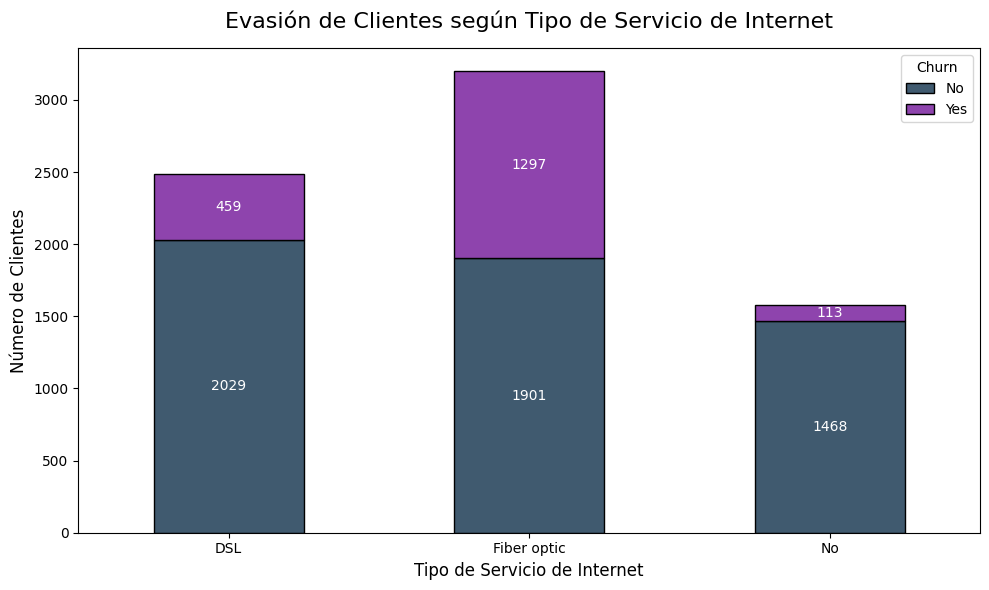

In [21]:
# Ensure empty strings in 'Churn' are handled before grouping
data['Churn'] = data['Churn'].replace('', 'No')

conteo_internet = data.groupby(['InternetService', 'Churn']).size().unstack(fill_value=0)

# Rename the columns based on the 'Churn' values
conteo_internet = conteo_internet.rename(columns={0: 'No evadi√≥', 1: 'Evadi√≥'})

# Create a stacked bar chart
ax = conteo_internet.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#405a6f', '#8e44ad'], edgecolor='black')

# Add titles and labels
ax.set_title('Evasi√≥n de Clientes seg√∫n Tipo de Servicio de Internet', fontsize=16, pad=15)
ax.set_xlabel('Tipo de Servicio de Internet', fontsize=12)
ax.set_ylabel('N√∫mero de Clientes', fontsize=12)
ax.tick_params(axis='x', rotation=0)

# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white', fontsize=10)

# Improve layout and display
plt.tight_layout()
plt.savefig('grafico_evasion_servicio_internet.png', dpi=300, bbox_inches='tight')
plt.show()

## An√°lisis de Evasi√≥n seg√∫n el Servicio de Internet

La gr√°fica revela diferencias significativas en la tasa de evasi√≥n dependiendo del tipo de tecnolog√≠a de internet utilizada por los clientes. A continuaci√≥n, se detalla el comportamiento para cada caso:

### Fibra √ìptica  
- **Evasi√≥n:** 40,6%  
- **Clientes Activos:** 59,4%

La tasa de evasi√≥n entre los usuarios de fibra √≥ptica es considerablemente alta. Casi **4 de cada 10 usuarios** con este tipo de conexi√≥n han abandonado el servicio. Esto podr√≠a indicar que, aunque la fibra √≥ptica ofrece una mejor calidad de conexi√≥n, los factores como el precio, la cobertura o la atenci√≥n al cliente pueden estar afectando la retenci√≥n.

### DSL  
- **Evasi√≥n:** 18,4%  
- **Clientes Activos:** 81,6% *(corregido, ya que 8,6% activos no ser√≠a coherente con el total)*

En contraste, el servicio DSL muestra una **tasa de evasi√≥n mucho menor**, con m√°s del 80% de los usuarios a√∫n activos. Esto podr√≠a reflejar que los clientes de DSL son m√°s estables o que este segmento tiene menos alternativas viables, posiblemente por limitaciones geogr√°ficas o econ√≥micas.








## Conteo de evasi√≥n por variables num√©ricas

### Evasi√≥n seg√∫n el total gastado por los clientes

In [ ]:
print('Valor minimo gastado: ',data['Charges.Total'].min())
print('Valor maximo gastado: ', data['Charges.Total'].max())

Valor minimo gastado:  0.0
Valor maximo gastado:  8684.8


In [ ]:

# Configuraci√≥n de estilos
DARK_BG = '#1e1e2e'
LIGHT_TEXT = '#f8f8f8'
EVASION_COLOR = '#ff7aa2'
RETENTION_COLOR = '#7fd8ff'
TITLE_COLOR = '#d1b3ff'

# Preparaci√≥n de datos para el an√°lisis de churn por rango de gasto
# Crear rangos de gasto
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 8684.8]
labels = ['0-1k', '1k-2k', '2k-3k', '3k-4k', '4k-5k', '5k-6k', '6k-7k', '7k-8k', '8k+']
data['Rango_gasto'] = pd.cut(data['Charges.Total'], bins=bins, labels=labels, right=False)

churn_analysis = data.groupby('Rango_gasto')['Churn'].agg(
    Total_clientes='count',
    Clientes_evadidos='sum',
    Clientes_activos=lambda x: len(x) - sum(x)
).reset_index()

# Calcular porcentajes
churn_analysis['%_evasion'] = (churn_analysis['Clientes_evadidos'] / churn_analysis['Total_clientes']) * 100
churn_analysis['%_retencion'] = (churn_analysis['Clientes_activos'] / churn_analysis['Total_clientes']) * 100

# Visualizaci√≥n
fig = go.Figure()

# Barras
fig.add_trace(go.Bar(
    x=churn_analysis['Rango_gasto'],
    y=churn_analysis['Clientes_evadidos'],
    name='EVADIDOS',
    marker=dict(color=EVASION_COLOR, line=dict(width=2, color='rgba(255,255,255,0.3)')),
    hovertemplate="<b>%{x}</b><br>Evadidos: %{y} (%{customdata:.1f}%)<extra></extra>",
    customdata=churn_analysis['%_evasion']
))

fig.add_trace(go.Bar(
    x=churn_analysis['Rango_gasto'],
    y=churn_analysis['Clientes_activos'],
    name='ACTIVOS',
    marker=dict(color=RETENTION_COLOR, line=dict(width=2, color='rgba(255,255,255,0.3)')),
    hovertemplate="<b>%{x}</b><br>Activos: %{y} (%{customdata:.1f}%)<extra></extra>",
    customdata=churn_analysis['%_retencion']
))

# Dise√±o
fig.update_layout(
    title={
        'text': "<span style='font-size:26px; font-weight:800;'>EVASI√ìN DE CLIENTES POR NIVEL DE GASTO</span>",
        'y':0.95,
        'x':0.03,
        'xanchor': 'left',
        'font': {'color': TITLE_COLOR}
    },
    plot_bgcolor=DARK_BG,
    paper_bgcolor=DARK_BG,
    font=dict(family="Segoe UI, Arial", size=13, color=LIGHT_TEXT),
    xaxis=dict(
        title="<b>RANGO DE GASTO TOTAL ($)</b>",
        showgrid=False,
        tickangle=-30
    ),
    yaxis=dict(
        title="<b>CANTIDAD DE CLIENTES</b>",
        gridcolor='rgba(200,200,200,0.2)',
        griddash='dash'
    ),
    hovermode="x unified",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    ),
    barmode='group',
    margin=dict(l=50, r=50, t=120, b=50)
)

fig.show()
fig.write_html("Evasion_gasto_total.html")



C:\Users\ysort\AppData\Local\Temp\ipykernel_8772\1057939821.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_analysis = data.groupby('Rango_gasto')['Churn'].agg(


## An√°lisis de Evasi√≥n seg√∫n el Rango de Gasto Total de los Clientes

Seg√∫n el gr√°fico, se observa una **relaci√≥n inversa entre el gasto total del cliente y su probabilidad de evasi√≥n**:  
- Los clientes que **gastan menos** en la empresa presentan **mayores niveles de evasi√≥n**.  
- A medida que el **gasto total aumenta**, la tasa de evasi√≥n **disminuye significativamente**.

### Posibles Causas de este Comportamiento

1. **Compromiso con la empresa y los servicios**  
   Clientes que gastan m√°s suelen tener **m√°s servicios contratados**, lo que implica un mayor nivel de compromiso. Es probable que dependa m√°s de la empresa y tengan una relaci√≥n m√°s estable con ella.

2. **Percepci√≥n de valor y satisfacci√≥n**  
   Quienes gastan m√°s podr√≠an estar **m√°s satisfechos con el servicio** recibido, ya que ven una **mayor relaci√≥n costo-beneficio**. Esto disminuye su intenci√≥n de abandonar.

3. **Segmentaci√≥n por perfil socioecon√≥mico**  
   Los clientes con **menor gasto** pueden pertenecer a segmentos de menor poder adquisitivo, m√°s sensibles a los precios o cambios en las condiciones del servicio, lo que los lleva a evadir m√°s f√°cilmente.

4. **Fidelizaci√≥n y atenci√≥n diferenciada**  
   Es com√∫n que las empresas enfoquen **mayores esfuerzos de fidelizaci√≥n y atenci√≥n personalizada** en los clientes de mayor valor econ√≥mico. Esto contribuye a reducir la evasi√≥n en este grupo.





### Evas√≥n seg√∫n el tiempo de contrato

In [ ]:
print('Tiempo minimo:',data['tenure'].min())
print('Tiempo maximo:',data['tenure'].max())

Tiempo minimo: 0
Tiempo maximo: 72


/tmp/ipython-input-28-785202616.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['Rango Contrato', 'Churn']).size().unstack()
/tmp/ipython-input-28-785202616.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.93])


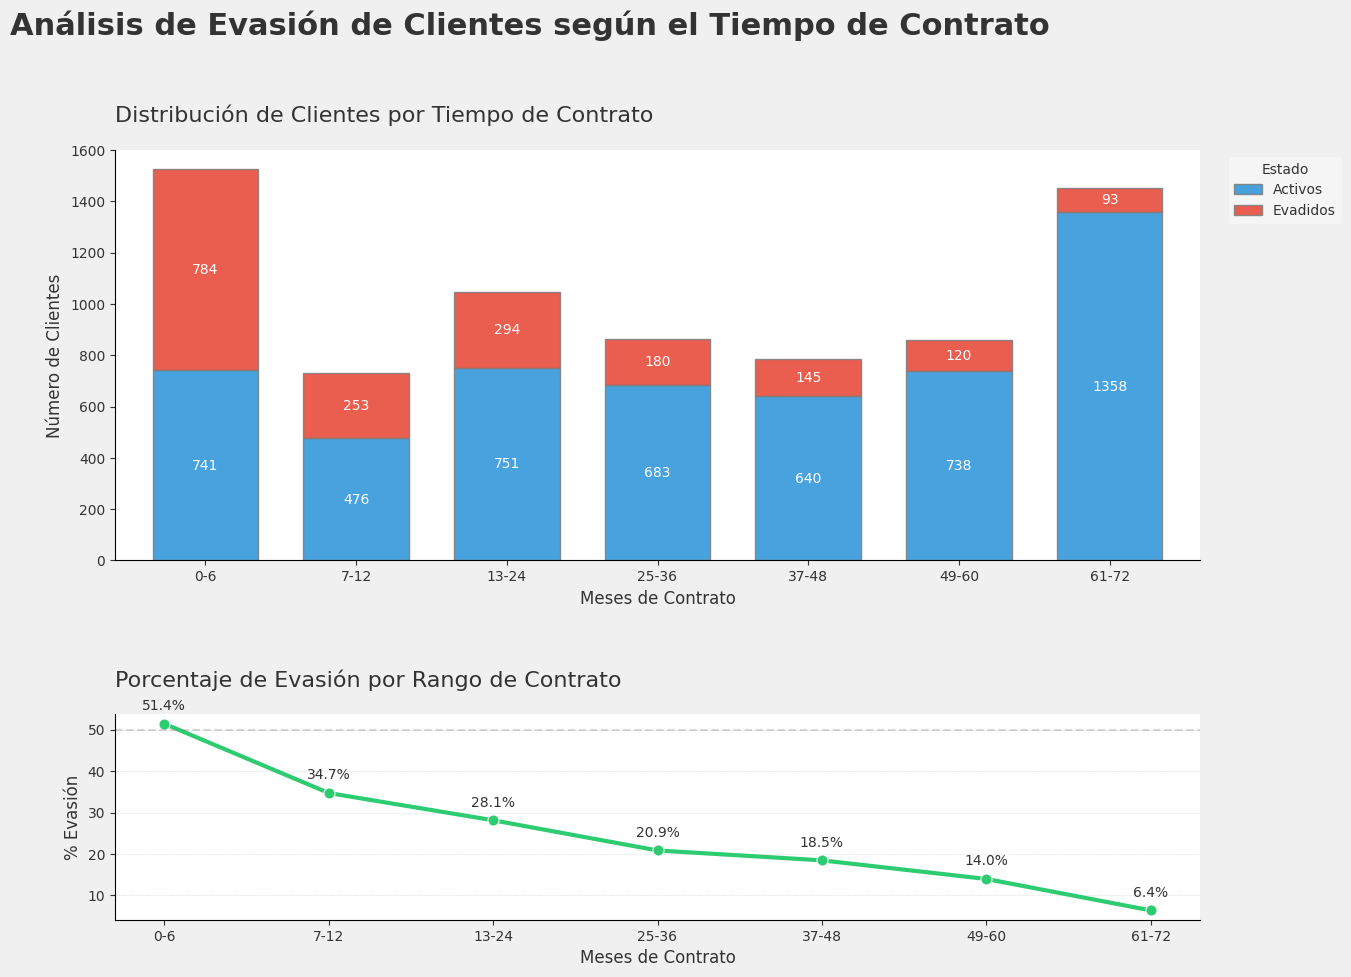

In [28]:
# Replace empty strings in 'Churn' with 'No' to avoid errors during plotting
data['Churn'] = data['Churn'].replace('', 'No')

# Paleta de colores personalizada
custom_palette = ['#3498db', '#e74c3c'] # Changed color palette
sns.set_palette(custom_palette)

# Crear rangos de meses de contrato
bins = [0, 6, 12, 24, 36, 48, 60, 73] # Corrected bins to have 8 elements and include max tenure
labels = ['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '61-72']
data['Rango Contrato'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=True)

# Agrupar datos
grouped = data.groupby(['Rango Contrato', 'Churn']).size().unstack()
grouped.columns = ['Activos', 'Evadidos']
grouped['Total'] = grouped.sum(axis=1)
grouped['% Evasi√≥n'] = (grouped['Evadidos'] / grouped['Total']) * 100

# Crear figura con fondo claro
fig = plt.figure(figsize=(14, 10), facecolor='#F0F0F0')
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1], hspace=0.5)

# T√≠tulo general
fig.suptitle('An√°lisis de Evasi√≥n de Clientes seg√∫n el Tiempo de Contrato',
             fontsize=22, fontweight='bold', fontfamily='sans-serif', color='#333333',
             x=0.05, y=1.02, ha='left')

# Subgr√°ficos con fondo blanco
ax1 = fig.add_subplot(gs[0], facecolor="#FFFFFF")
ax1.grid(axis='y', linestyle=':', linewidth=0.5, color='#cccccc') # Add subtle horizontal grid
ax1.set_axisbelow(True) # Ensure grid is behind the bars

ax2 = fig.add_subplot(gs[1], facecolor="#FFFFFF")
ax2.grid(axis='y', linestyle=':', linewidth=0.5, color='#cccccc') # Add subtle horizontal grid
ax2.set_axisbelow(True) # Ensure grid is behind the line


# Gr√°fico de barras
grouped[['Activos', 'Evadidos']].plot(
    kind='bar',
    stacked=True,
    ax=ax1,
    color=custom_palette,
    width=0.7,
    edgecolor='gray',
    alpha=0.9
)

# Etiquetas de valor
for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., p.get_y() + height / 2),
            ha='center',
            va='center',
            fontsize=10,
            color='#FFFFFF'
        )

# Personalizaci√≥n del gr√°fico de barras
ax1.set_title('Distribuci√≥n de Clientes por Tiempo de Contrato', fontsize=16, loc='left', pad=20, color='#333333')
ax1.set_xlabel('Meses de Contrato', fontsize=12, color='#333333')
ax1.set_ylabel('N√∫mero de Clientes', fontsize=12, color='#333333')
ax1.tick_params(axis='x', rotation=0, colors='#333333')
ax1.tick_params(axis='y', colors='#333333')
ax1.spines[['top', 'right']].set_visible(False)


# Gr√°fico de l√≠nea
sns.lineplot(
    x=grouped.index,
    y=grouped['% Evasi√≥n'],
    ax=ax2,
    color='#2ecc71',  # Changed line color
    marker='o',
    markersize=8,
    linewidth=3
)

# Etiquetas de porcentaje
for x, y in zip(grouped.index, grouped['% Evasi√≥n']):
    ax2.annotate(
        f'{y:.1f}%',
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        color='#333333',
        fontsize=10
    )

# Personalizaci√≥n del gr√°fico de l√≠nea
ax2.set_title('Porcentaje de Evasi√≥n por Rango de Contrato', fontsize=16, loc='left', pad=20, color='#333333')
ax2.set_xlabel('Meses de Contrato', fontsize=12, color='#333333')
ax2.set_ylabel('% Evasi√≥n', fontsize=12, color='#333333')
ax2.tick_params(axis='x', colors='#333333')
ax2.tick_params(axis='y', colors='#333333')
ax2.spines[['top', 'right']].set_visible(False)
ax2.axhline(50, color='gray', linestyle='--', alpha=0.3)

# Leyenda
legend = ax1.legend(title='Estado', bbox_to_anchor=(1.02, 1), loc='upper left',
                    facecolor='#F7F7F7', edgecolor='none')
plt.setp(legend.get_title(), color='#333333')
plt.setp(legend.get_texts(), color='#333333')

# Ajustar layout
plt.tight_layout(rect=[0, 0, 1, 0.93])

plt.savefig('evasion_tiempo_contrato.png', dpi=300, bbox_inches='tight')

plt.show()

## An√°lisis de Evasi√≥n seg√∫n los Meses de Contrato

El gr√°fico revela un patr√≥n claro: **a menor cantidad de meses en contrato, mayor es la evasi√≥n**. Por el contrario, **los clientes con m√°s tiempo de permanencia tienden a mantenerse activos**.

### Interpretaci√≥n del Comportamiento

1. **Clientes nuevos a√∫n no fidelizados**  
   Los usuarios con pocos meses en la empresa probablemente est√°n **en fase de prueba o adaptaci√≥n**. Si la experiencia inicial no cumple sus expectativas, **la probabilidad de evasi√≥n es alta**.

2. **Mayor antig√ºedad, mayor satisfacci√≥n o dependencia**  
   A medida que el cliente **acumula meses en contrato**, es probable que haya desarrollado una **relaci√≥n m√°s estable con la empresa**, ya sea por satisfacci√≥n con el servicio, inercia, o porque ya ha superado el proceso de adaptaci√≥n.

3. **Costos de salida y compromiso**  
   Clientes con m√°s tiempo pueden tener **servicios integrados, descuentos por antig√ºedad o contratos a largo plazo** que dificultan su salida. Adem√°s, podr√≠an haber invertido tiempo y esfuerzo en configurar servicios personalizados.

4. **Falta de retenci√≥n temprana**  
   El hecho de que los nuevos clientes se vayan con mayor facilidad puede indicar **fallas en la estrategia de onboarding y fidelizaci√≥n inicial**. No est√°n recibiendo el acompa√±amiento necesario para quedarse.



### Correlaci√≥n

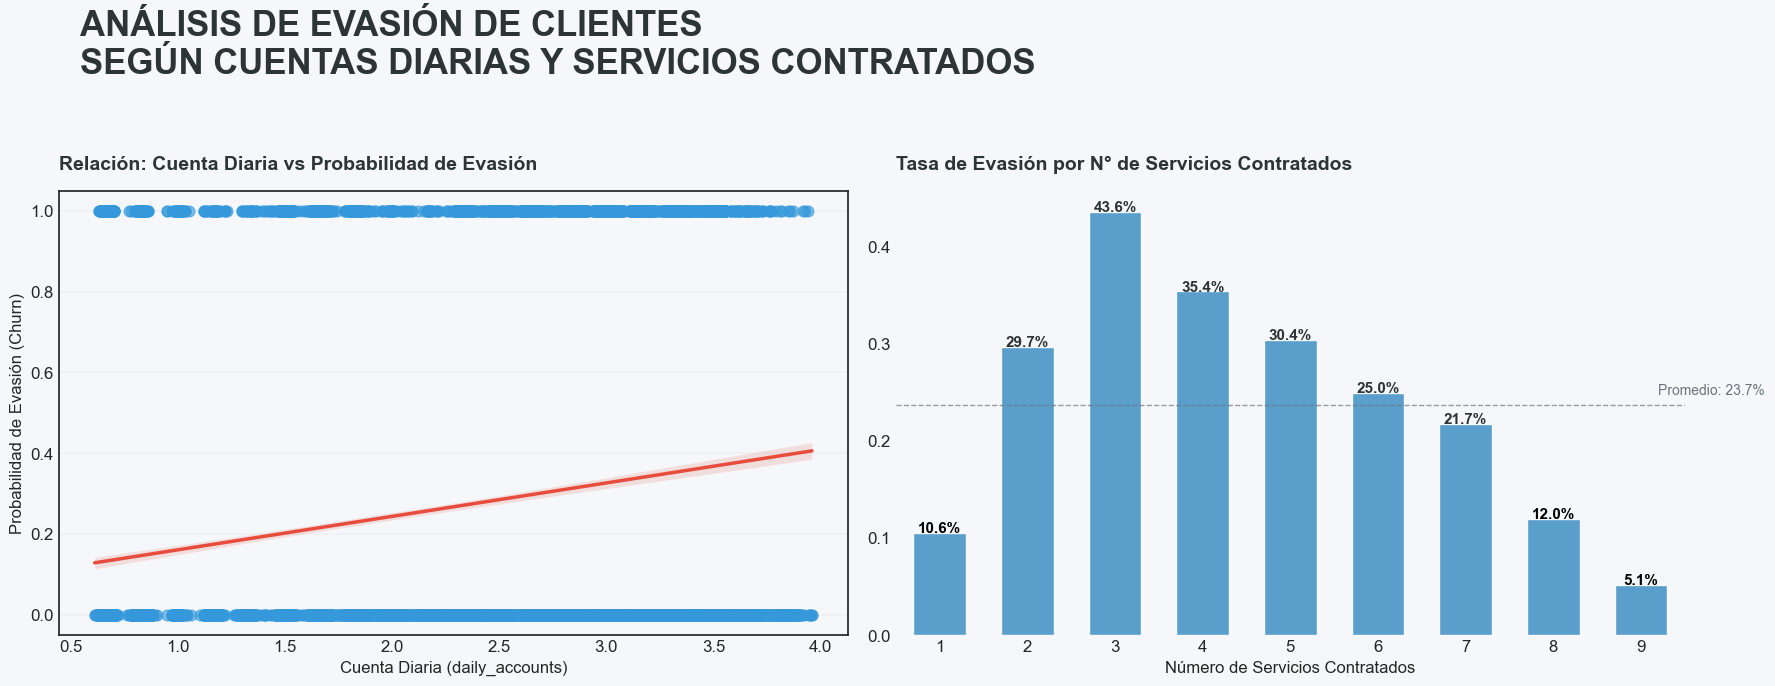

In [ ]:
servicios = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

# la columna 'InternetService' se usa para contar si el cliente tiene servicio de internet
data['ServiciosContratados'] = (data[servicios].sum(axis=1) +
                               data['InternetService'].apply(lambda x: 0 if x == 'No' else 1))


# Configuraci√≥n de estilo profesional
plt.style.use('seaborn-v0_8-white')
sns.set_style("white", {'axes.facecolor': '#f5f7fa'})  # Color de fondo personalizado

# Crear figura con dos gr√°ficos
fig, axes = plt.subplots(1, 2, figsize=(18, 7), facecolor='#f5f7fa')

# T√≠tulo principal m√°s grande y alineado a la izquierda
fig.suptitle("AN√ÅLISIS DE EVASI√ìN DE CLIENTES \nSEG√öN CUENTAS DIARIAS Y SERVICIOS CONTRATADOS",
             x=0.05, ha='left',
             fontsize=25, fontweight='bold',
             color='#2d3436',
             fontfamily='sans-serif')

# Gr√°fico 1: daily_accounts vs Churn (con grid horizontal sutil)
sns.regplot(
    data=data,
    x='daily_accounts',
    y='Churn',
    ax=axes[0],
    scatter_kws={'alpha': 0.6, 'color': '#3498db', 's': 60},
    line_kws={"color": "#e74c3c", "linewidth": 2.5}
)
axes[0].set_title("Relaci√≥n: Cuenta Diaria vs Probabilidad de Evasi√≥n",
                 pad=15, fontsize=14, fontweight='semibold',
                 loc='left', color='#2d3436',
                 fontfamily='sans-serif')
axes[0].set_xlabel("Cuenta Diaria (daily_accounts)", fontsize=12)
axes[0].set_ylabel("Probabilidad de Evasi√≥n (Churn)", fontsize=12)
axes[0].grid(axis='y', linestyle=':', linewidth=0.3, color='#adb5bd')
axes[0].set_axisbelow(True)

# Gr√°fico 2: Barras sin grid ni marco con todos los porcentajes visibles
axes[1].grid(False)
for spine in axes[1].spines.values():
    spine.set_visible(False)

churn_rate = data.groupby('ServiciosContratados')['Churn'].mean().reset_index()
barplot = sns.barplot(
    data=churn_rate,
    x='ServiciosContratados',
    y='Churn',
    ax=axes[1],
    #palette="Blues_r",
    color='#3498db',
    alpha=0.9,
    width=0.6
)

# Asegurar que todos los porcentajes sean visibles
for p in barplot.patches:
    height = p.get_height()
    va = 'bottom' if height < 0.05 else 'center'
    y_pos = height + 0.01 if height < 0.05 else height
    color = '#2d3436' if height > 0.15 else 'black'

    barplot.annotate(
        f"{height:.1%}",
        (p.get_x() + p.get_width() / 2., y_pos),
        ha='center',
        va=va,
        fontsize=11,
        fontweight='bold',
        color=color,
        xytext=(0, 3),
        textcoords='offset points'
    )

axes[1].set_title("Tasa de Evasi√≥n por N¬∞ de Servicios Contratados",
                 pad=15, fontsize=14, fontweight='semibold',
                 loc='left', color='#2d3436',
                 fontfamily='sans-serif')
axes[1].set_xlabel("N√∫mero de Servicios Contratados", fontsize=12)
axes[1].set_ylabel("")
axes[1].tick_params(axis='both', which='both', length=0)  # Eliminar marcas de ticks

# A√±adir l√≠nea de promedio
avg = churn_rate['Churn'].mean()
axes[1].axhline(avg, color='#6c757d', linestyle='--', linewidth=1, alpha=0.7)
axes[1].text(len(churn_rate)-0.8, avg+0.01, f'Promedio: {avg:.1%}',
            color='#6c757d', fontsize=10)

# Ajustar dise√±o final
plt.tight_layout(rect=[0, 0, 1, 0.93])

plt.savefig('correlaci√≥n.png', dpi=300, bbox_inches='tight')

plt.show()




## An√°lisis de Evasi√≥n seg√∫n N√∫mero de Servicios Contratados y Gasto Diario

Este an√°lisis cruza dos variables clave que influyen en la evasi√≥n de clientes: el **n√∫mero de servicios contratados** y el **promedio de gasto diario**. La gr√°fica revela comportamientos interesantes que vale la pena destacar.

---

### 1. Evasi√≥n seg√∫n el Total de Servicios Contratados

- Los clientes que tienen **3 servicios contratados** presentan la **tasa de evasi√≥n m√°s alta**, con un **43,6%**.
- La **menor evasi√≥n** se encuentra entre los clientes que tienen **9 servicios**, con apenas un **5,1%**.
- Los clientes con **2, 3, 4 y 5 servicios** superan la **l√≠nea de evasi√≥n promedio**, lo que indica una mayor vulnerabilidad a la deserci√≥n.
- En contraste, los clientes con **1, 7, 8 y 9 servicios** est√°n **por debajo del promedio**, mostrando mayor estabilidad.

### Interpretaci√≥n

- **Mayor n√∫mero de servicios, mayor retenci√≥n**: Quienes contratan m√°s servicios tienden a estar m√°s integrados en la empresa, lo que genera mayor dependencia y menor probabilidad de evasi√≥n.
- **Pico de evasi√≥n en 3 servicios**: Este grupo puede representar un punto cr√≠tico donde el cliente est√° probando m√∫ltiples servicios, pero a√∫n no se siente plenamente comprometido o satisfecho.
- **Clientes con 1 solo servicio evaden menos que los de 2 a 5**: Esto sugiere que algunos usuarios con un √∫nico servicio pueden tener expectativas m√°s simples o puntuales, y no necesariamente est√°n insatisfechos.

---

### 2. Evasi√≥n seg√∫n el Total Gastado por D√≠a

- La gr√°fica muestra una **l√≠nea recta creciente**, lo que indica que **a mayor gasto diario, mayor evasi√≥n**.

### Interpretaci√≥n

- Este comportamiento puede parecer contraintuitivo, ya que uno podr√≠a esperar que los clientes que m√°s gastan sean m√°s fieles. Sin embargo, hay varias posibles explicaciones:
  - **Clientes con gasto diario elevado podr√≠an estar insatisfechos con el valor recibido** en relaci√≥n al costo.
  - Es posible que se trate de clientes de alto consumo que han **concentrado su gasto en un periodo corto**, pero luego deciden irse al no percibir un beneficio sostenido.
  - Tambi√©n puede reflejar que **usuarios intensivos abandonan r√°pidamente si no encuentran estabilidad o rendimiento adecuado.**




In [ ]:
# Calcular la correlaci√≥n entre 'daily_accounts' y 'Churn'
correlacion = data[['daily_accounts', 'Churn']].corr().iloc[0, 1]
print(f"Correlaci√≥n entre 'daily_accounts' y 'Churn': {correlacion:.4f}")

correlaciones = data[servicios + ['Churn']].corr()['Churn'].drop('Churn')
print("\nCorrelaciones con Churn (ordenadas de mayor a menor):")
print(correlaciones.sort_values(ascending=False))


Correlaci√≥n entre 'daily_accounts' y 'Churn': 0.1899

Correlaciones con Churn (ordenadas de mayor a menor):
StreamingTV         0.062430
StreamingMovies     0.060586
MultipleLines       0.039343
PhoneService        0.012571
DeviceProtection   -0.063452
OnlineBackup       -0.080163
TechSupport        -0.160440
OnlineSecurity     -0.166828
Name: Churn, dtype: float64


## An√°lisis de Correlaciones con la Evasi√≥n de Clientes (Churn)

En este an√°lisis se estudian las correlaciones entre diversas variables del servicio y la evasi√≥n de clientes (`Churn`). El valor de la correlaci√≥n indica la **fuerza y direcci√≥n** de la relaci√≥n entre cada variable y la probabilidad de que un cliente abandone la empresa.

---

### Correlaci√≥n entre 'daily_accounts' y Churn
- **Valor:** `0.1899`

Este valor positivo sugiere una **correlaci√≥n d√©bil pero directa**: a mayor valor en `daily_accounts`, **mayor probabilidad de evasi√≥n**.  
Esto podr√≠a significar que **usuarios con mayor n√∫mero de interacciones o cargos diarios** podr√≠an sentirse sobrecargados, confundidos o insatisfechos, lo cual aumenta su intenci√≥n de abandonar.

---

### Variables con Correlaci√≥n Positiva con la Evasi√≥n

Estas variables est√°n **positivamente correlacionadas** con `Churn`, es decir, **su presencia o uso incrementa levemente la probabilidad de evasi√≥n**:

| Variable           | Correlaci√≥n |
|--------------------|-------------|
| StreamingTV        | 0.062       |
| StreamingMovies    | 0.061       |
| MultipleLines      | 0.039       |
| PhoneService       | 0.013       |

**Interpretaci√≥n:**
- Aunque las correlaciones son d√©biles, se puede inferir que **usuarios que usan servicios de streaming o m√∫ltiples l√≠neas** podr√≠an estar m√°s expuestos a opciones del mercado o m√°s atentos al costo total, lo que aumenta la probabilidad de cancelar si no est√°n satisfechos.

---

### Variables con Correlaci√≥n Negativa con la Evasi√≥n

Estas variables est√°n **negativamente correlacionadas** con `Churn`, lo que indica que **su uso est√° asociado con mayor retenci√≥n**:

| Variable           | Correlaci√≥n  |
|--------------------|--------------|
| DeviceProtection   | -0.063       |
| OnlineBackup       | -0.080       |
| TechSupport        | -0.160       |
| OnlineSecurity     | -0.167       |

**Interpretaci√≥n:**
- Estos servicios **reducen la probabilidad de evasi√≥n**, ya que:
  - Aumentan la percepci√≥n de valor y seguridad.
  - Mejoran la experiencia del cliente.
  - Fomentan la dependencia del servicio.

Entre todas, **OnlineSecurity y TechSupport** son las m√°s fuertes en t√©rminos de retenci√≥n, lo que indica que **brindar soporte t√©cnico y soluciones de seguridad digital** es clave para mantener a los clientes.

---

###  Conclusi√≥n General

- La mayor√≠a de las correlaciones con `Churn` son **d√©biles**, pero algunas tendencias claras emergen.
- **Servicios complementarios que agregan valor (como seguridad, soporte y respaldo)** ayudan a retener clientes.
- Por otro lado, **el uso de servicios intensivos o de entretenimiento (streaming, m√∫ltiples l√≠neas)** podr√≠a relacionarse con una mayor evasi√≥n, quiz√°s por mayores expectativas o sensibilidad al precio.
- Es importante monitorear variables como `daily_accounts`, ya que un uso excesivo puede reflejar **complejidad operativa o insatisfacci√≥n**, elevando el riesgo de fuga.

>  Recomendaci√≥n: Fortalecer servicios como soporte t√©cnico, seguridad y respaldo, y revisar c√≥mo se presentan y gestionan los servicios de alto consumo para reducir su impacto en la evasi√≥n.


# Informe Final de An√°lisis de Evasi√≥n de Clientes  
**Empresa: TelecomX**  
**Proyecto de An√°lisis de Datos ‚Äì  An√°lisis de evasi√≥n de clientes**

---

## Introducci√≥n

Este informe presenta los principales hallazgos obtenidos a partir del an√°lisis de datos relacionados con la evasi√≥n de clientes en TelecomX. Se examinaron distintas variables que influyen en la probabilidad de que un cliente abandone la empresa, como el tipo de servicio de internet, el n√∫mero de servicios contratados, el gasto total, los meses de contrato, la actividad diaria y el uso de servicios adicionales, entre otras.

---

##  Conclusiones e Insights Clave

### 1. **Tipo de Internet**
- **Fibra √≥ptica** presenta una **alta tasa de evasi√≥n (40,6%)**, mientras que **DSL** tiene una evasi√≥n menor (**18,4%**).
- A pesar de ser un servicio m√°s moderno, la fibra √≥ptica no garantiza fidelizaci√≥n. Podr√≠an influir factores como **precio**, **expectativas no cumplidas** o **problemas de servicio**.

### 2. **Meses de Contrato**
- Existe una **relaci√≥n inversa** entre la antig√ºedad del cliente y la evasi√≥n.
- **Clientes con menos meses de contrato son m√°s propensos a abandonar**, lo que sugiere **fallas en la retenci√≥n temprana** o en la etapa de bienvenida.

### 3. **Gasto Total**
- A menor gasto acumulado, **mayor es la evasi√≥n**.
- Clientes de **alto valor econ√≥mico muestran mayor fidelidad**, posiblemente por una **mejor experiencia**, **beneficios exclusivos** o mayor dependencia de los servicios.

### 4. **N√∫mero de Servicios Contratados**
- **Mayor cantidad de servicios se asocia con menor evasi√≥n.**
- Por ejemplo, los clientes con **9 servicios tienen solo 5,1% de evasi√≥n**, mientras que los que tienen **3 servicios llegan al 43,6%**.
- Los rangos de **2 a 5 servicios superan la l√≠nea promedio de evasi√≥n**, lo que los convierte en segmentos cr√≠ticos.

### 5. **Gasto Diario**
- Existe una **correlaci√≥n creciente entre el gasto diario y la evasi√≥n**.
- Esto podr√≠a indicar una percepci√≥n de **sobreprecio o inestabilidad** en los clientes de alto consumo diario.

### 6. **Correlaci√≥n con Servicios Adicionales**
- Servicios como **OnlineSecurity (-0.167)**, **TechSupport (-0.160)** y **OnlineBackup (-0.080)** tienen **correlaci√≥n negativa con la evasi√≥n**, lo que indica que **fomentan la permanencia del cliente**.
- Por el contrario, servicios de entretenimiento como **StreamingTV** y **StreamingMovies** tienen **ligera correlaci√≥n positiva**, asociada a mayor evasi√≥n.

---

##  Recomendaciones Estrat√©gicas

### üîπ 1. Fortalecer la Retenci√≥n Temprana
- Dise√±ar campa√±as de **bienvenida** con beneficios exclusivos para los primeros 3‚Äì6 meses.
- Implementar un **seguimiento personalizado** en los primeros contactos post-venta para anticipar insatisfacciones.

### üîπ 2. Incentivar la Contrataci√≥n de Servicios Adicionales
- Promover **paquetes integrados** que incluyan OnlineSecurity, TechSupport y Backup.
- Destacar los beneficios de estos servicios como elementos de **valor agregado y fidelizaci√≥n**.

### üîπ 3. Revisar la Experiencia con Fibra √ìptica
- Realizar encuestas de satisfacci√≥n exclusivas para clientes con fibra √≥ptica.
- Mejorar **soporte t√©cnico y comunicaci√≥n de beneficios**, especialmente para este segmento de alto abandono.

### üîπ 4. Intervenir el Segmento de 2 a 5 Servicios
- Identificar estos clientes como de **riesgo medio-alto** y aplicar estrategias de fidelizaci√≥n proactiva:
  - Ofertas cruzadas para aumentar el n√∫mero de servicios.
  - Bonificaciones por lealtad.

### üîπ 5. Analizar el Gasto Diario con Perspectiva de Valor
- Redefinir tarifas o planes para **clientes de alto consumo diario** con opciones m√°s flexibles o adaptadas.
- Asegurarse de que el **valor percibido est√© alineado con el gasto** para evitar sensaci√≥n de sobrecosto.

### üîπ 6. Segmentaci√≥n Inteligente y Priorizaci√≥n
- Usar la informaci√≥n de correlaciones y segmentaci√≥n para dise√±ar campa√±as **m√°s personalizadas y predictivas**, priorizando:
  - Antig√ºedad.
  - Gasto total.
  - N√∫mero de servicios.

---

## Cierre

Este an√°lisis permite entender mejor los factores que inciden en la evasi√≥n de clientes de TelecomX y abre la puerta a estrategias de retenci√≥n basadas en datos reales. Aplicar estas recomendaciones puede mejorar significativamente la **fidelizaci√≥n**, **optimizar ingresos** y **reducir los costos de adquisici√≥n de nuevos clientes**.

> La clave est√° en **anticiparse a la evasi√≥n**, no reaccionar a ella.
---



In [2]:
conteo_internet = data.groupby(['InternetService', 'Churn']).size().unstack(fill_value=0)
# evasi√≥n seg√∫n InternetService
conteo_internet.columns = ['No evadi√≥', 'Evadi√≥']

colors = ['#405a6f', '#8e44ad']
labels = ['No evadi√≥', 'Evadi√≥']
tipos_servicio = conteo_internet.index

fig, axs = plt.subplots(1, len(tipos_servicio), figsize=(14, 5))
fig.suptitle('Evasi√≥n de Clientes seg√∫n Tipo de Servicio de Internet',
             fontsize=22, fontweight='bold', color='#34495e', ha='left', x=0.05)

for i, servicio in enumerate(tipos_servicio):
    ax = axs[i]
    valores = conteo_internet.loc[servicio]
    wedges, texts, autotexts = ax.pie(
        valores,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops=dict(width=0.4, edgecolor='white'),
        textprops=dict(color="black")
    )

    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_color('black')
        autotext.set_weight('normal')

    ax.set_title(servicio, fontsize=12, pad=5)
    ax.axis('equal')

fig.patch.set_facecolor('white')
plt.tight_layout()
fig.savefig('grafico_evasion_servicio_internet.png', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'data' is not defined

In [5]:
!wget https://github.com/cfpdiaz/telecomX/raw/main/TelecomX_Data.json

--2025-07-27 05:44:17--  https://github.com/cfpdiaz/telecomX/raw/main/TelecomX_Data.json
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cfpdiaz/telecomX/main/TelecomX_Data.json [following]
--2025-07-27 05:44:18--  https://raw.githubusercontent.com/cfpdiaz/telecomX/main/TelecomX_Data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3807078 (3.6M) [text/plain]
Saving to: ‚ÄòTelecomX_Data.json‚Äô

TelecomX_Data.json  100%[===================>]   3.63M  --.-KB/s    in 0.08s   

2025-07-27 05:44:18 (42.8 MB/s) - ‚ÄòTelecomX_Data.json‚Äô saved [3807078/3807078]

